In [1]:
import pandas as pd

In [2]:
df17 = pd.read_csv('df17.csv')
df18 = pd.read_csv('df18.csv')
df19 = pd.read_csv('df19.csv')
df20 = pd.read_csv('df20.csv')

In [3]:
df = pd.concat([df17, df18, df19, df20])

In [4]:
df.specialty = df.specialty.str.replace('\d+', '')

C:\Users\Acer\AppData\Local\Temp/ipykernel_7468/3302241255.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.specialty = df.specialty.str.replace('\d+', '')


In [5]:
df = df.drop('Unnamed: 0', axis = 1)

In [6]:
df = df.drop(['student_id', 'status'], axis = 1)

In [7]:
df['priority'] = df.priority.astype('category')
df['kvota'] = df.kvota.astype('category')
df['vstup'] = df.vstup.astype('category')
df.priority = df.priority.cat.codes
df.kvota = df.kvota.cat.codes
df.vstup = df.vstup.cat.codes

In [8]:
df['mark_mean_years'] = 0
df.loc[(df.year == 2017) | (df.year == 2018) | (df.year == 2019), 'mark_mean_years'] = df[(df.year == 2017) | (df.year == 2018) | (df.year == 2019)].groupby(['university', 'specialty']).mark_mean.transform('mean')
df['mark_mean_years'] = df.groupby(['university', 'specialty']).mark_mean_years.transform('max')

df['placesCount_years'] = 0
df.loc[(df.year == 2017) | (df.year == 2018) | (df.year == 2019), 'placesCount_years'] = df[(df.year == 2017) | (df.year == 2018) | (df.year == 2019)].groupby(['university', 'specialty']).placesCount.transform('mean')
df['placesCount_years'] = df.groupby(['university', 'specialty']).placesCount_years.transform('max')

df['budgetCount_years'] = 0
df.loc[(df.year == 2017) | (df.year == 2018) | (df.year == 2019), 'budgetCount_years'] = df[(df.year == 2017) | (df.year == 2018) | (df.year == 2019)].groupby(['university', 'specialty']).budgetCount.transform('mean')
df['budgetCount_years'] = df.groupby(['university', 'specialty']).budgetCount_years.transform('max')

df['contractCount_years'] = 0
df.loc[(df.year == 2017) | (df.year == 2018) | (df.year == 2019), 'contractCount_years'] = df[(df.year == 2017) | (df.year == 2018) | (df.year == 2019)].groupby(['university', 'specialty']).contractCount.transform('mean')
df['contractCount_years'] = df.groupby(['university', 'specialty']).contractCount_years.transform('max')

df['budget_mark_mean_years'] = 0
df.loc[(df.year == 2017) | (df.year == 2018) | (df.year == 2019), 'budget_mark_mean_years'] = df[(df.year == 2017) | (df.year == 2018) | (df.year == 2019)].groupby(['university', 'specialty']).budget_mark_mean.transform('mean')
df['budget_mark_mean_years'] = df.groupby(['university', 'specialty']).budget_mark_mean_years.transform('max')

df['abit_count_years'] = 0
df.loc[(df.year == 2017) | (df.year == 2018) | (df.year == 2019), 'abit_count_years'] = df[(df.year == 2017) | (df.year == 2018) | (df.year == 2019)].groupby(['university', 'specialty']).abit_count.transform('mean')
df['abit_count_years'] = df.groupby(['university', 'specialty']).abit_count_years.transform('max')

df['mark_max_years'] = 0
df.loc[(df.year == 2017) | (df.year == 2018) | (df.year == 2019), 'mark_max_years'] = df[(df.year == 2017) | (df.year == 2018) | (df.year == 2019)].groupby(['university', 'specialty']).mark_max.transform('mean')
df['mark_max_years'] = df.groupby(['university', 'specialty']).mark_max_years.transform('max')

df['mark_min_years'] = 0
df.loc[(df.year == 2017) | (df.year == 2018) | (df.year == 2019), 'mark_min_years'] = df[(df.year == 2017) | (df.year == 2018) | (df.year == 2019)].groupby(['university', 'specialty']).mark_min.transform('mean')
df['mark_min_years'] = df.groupby(['university', 'specialty']).mark_min_years.transform('max')

df['budget_mark_max_years'] = 0
df.loc[(df.year == 2017) | (df.year == 2018) | (df.year == 2019), 'budget_mark_max_years'] = df[(df.year == 2017) | (df.year == 2018) | (df.year == 2019)].groupby(['university', 'specialty']).budget_mark_max.transform('mean')
df['budget_mark_max_years'] = df.groupby(['university', 'specialty']).budget_mark_max_years.transform('max')

df['budget_mark_min_years'] = 0
df.loc[(df.year == 2017) | (df.year == 2018) | (df.year == 2019), 'budget_mark_min_years'] = df[(df.year == 2017) | (df.year == 2018) | (df.year == 2019)].groupby(['university', 'specialty']).budget_mark_min.transform('mean')
df['budget_mark_min_years'] = df.groupby(['university', 'specialty']).budget_mark_min_years.transform('max')

In [9]:
df = df.drop(['placesCount', 'budgetCount', 'contractCount', 'budget_mark_mean', 'mark_mean', 'abit_count', 'mark_max', 'mark_min','budget_mark_max','budget_mark_min','position'], axis = 1)

In [10]:
colsToScale = list(df.columns)
colsToScale.remove('priority')
colsToScale.remove('kvota')
colsToScale.remove('vstup')
print(colsToScale)

['mark', 'year', 'specialty', 'university', 'mark_mean_years', 'placesCount_years', 'budgetCount_years', 'contractCount_years', 'budget_mark_mean_years', 'abit_count_years', 'mark_max_years', 'mark_min_years', 'budget_mark_max_years', 'budget_mark_min_years']


In [11]:
df.head()

,priority,mark,kvota,year,specialty,university,vstup,mark_mean_years,placesCount_years,budgetCount_years,contractCount_years,budget_mark_mean_years,abit_count_years,mark_max_years,mark_min_years,budget_mark_max_years,budget_mark_min_years
0,0,200.0,0,2017,Хімія,Харківський національний університет імені В.Н...,1,177.925824,100.0,55.104348,44.895652,183.389126,193.038261,200.0,134.192557,200.0,157.357057
1,0,200.0,0,2017,Хімія,Харківський національний університет імені В.Н...,1,177.925824,100.0,55.104348,44.895652,183.389126,193.038261,200.0,134.192557,200.0,157.357057
2,2,200.0,0,2017,Хімія,Харківський національний університет імені В.Н...,0,177.925824,100.0,55.104348,44.895652,183.389126,193.038261,200.0,134.192557,200.0,157.357057
3,0,200.0,0,2017,Хімія,Харківський національний університет імені В.Н...,1,177.925824,100.0,55.104348,44.895652,183.389126,193.038261,200.0,134.192557,200.0,157.357057
4,2,200.0,0,2017,Хімія,Харківський національний університет імені В.Н...,0,177.925824,100.0,55.104348,44.895652,183.389126,193.038261,200.0,134.192557,200.0,157.357057


In [12]:
df = df.drop('year', axis = 1)

In [13]:
to_pred = df.drop(['priority', 'mark', 'kvota'], axis = 1)

In [14]:
to_pred = to_pred.drop('vstup', axis = 1)

In [15]:
to_pred.columns

Index(['specialty', 'university', 'mark_mean_years', 'placesCount_years',
       'budgetCount_years', 'contractCount_years', 'budget_mark_mean_years',
       'abit_count_years', 'mark_max_years', 'mark_min_years',
       'budget_mark_max_years', 'budget_mark_min_years'],
      dtype='object')

In [16]:
to_pred = to_pred.drop_duplicates()

In [17]:
to_pred.to_csv('df_predict.csv')

In [18]:
df = df.drop(['specialty', 'university'], axis = 1)

In [19]:
to_pred = pd.read_csv('df_predict.csv')

In [20]:
to_pred

,Unnamed: 0,specialty,university,mark_mean_years,placesCount_years,budgetCount_years,contractCount_years,budget_mark_mean_years,abit_count_years,mark_max_years,mark_min_years,budget_mark_max_years,budget_mark_min_years
0,0,Хімія,Харківський національний університет імені В.Н...,177.925824,100.000000,55.104348,4.489565e+01,183.389126,193.038261,200.000000,134.192557,200.000000,157.357057
1,214,"Фінанси,банківськасправатастрахування",Харківський національний університет імені В.Н...,164.599285,99.654696,30.484807,6.916989e+01,179.981424,235.831492,198.400506,117.906329,188.972028,160.691276
2,518,Філософія,Харківський національний університет імені В.Н...,159.289960,33.815029,15.034682,1.878035e+01,179.765380,94.595376,193.785179,119.381064,187.282327,160.034335
3,627,Філологія,Харківський національний університет імені В.Н...,172.697773,105.268324,46.966281,7.065570e+07,189.854562,764.864838,199.680292,131.207430,196.525462,174.636141
4,3118,Фізикатаастрономія,Харківський національний університет імені В.Н...,171.236284,85.351562,19.617188,6.573438e+01,173.253439,68.260417,200.000000,119.569500,196.933487,146.662143
...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,16634,Міжнароднеправо,Сумський державний університет,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
257,20276,Середняосвіта,Сумський державний університет,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
258,84069,Кібербезпека,Львівський національний університет імені Іван...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
259,86696,Інженеріяпрограмногозабезпечення,Львівський національний університет імені Іван...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
from joblib import dump, load

In [23]:
scaler = load('scaler.joblib')

In [24]:
forest = load('forest.joblib')

In [25]:
from sklearn.pipeline import Pipeline

In [26]:
from sklearn.compose import ColumnTransformer

In [27]:
df.columns

Index(['priority', 'mark', 'kvota', 'vstup', 'mark_mean_years',
       'placesCount_years', 'budgetCount_years', 'contractCount_years',
       'budget_mark_mean_years', 'abit_count_years', 'mark_max_years',
       'mark_min_years', 'budget_mark_max_years', 'budget_mark_min_years'],
      dtype='object')

In [28]:
cols = ['mark',\
 'mark_mean_years',\
 'placesCount_years',\
 'budgetCount_years',\
 'contractCount_years',\
 'budget_mark_mean_years',\
 'abit_count_years',\
 'mark_max_years',\
 'mark_min_years',\
 'budget_mark_max_years',\
 'budget_mark_min_years']

In [29]:
ct = ColumnTransformer(
    remainder='passthrough',
    transformers=[
        ('MinMaxScaler', scaler , cols)
    ])

In [30]:
ct.fit(df.drop('vstup', axis = 1), df.vstup)

ColumnTransformer(remainder='passthrough',
                  transformers=[('MinMaxScaler', MinMaxScaler(),
                                 ['mark', 'mark_mean_years',
                                  'placesCount_years', 'budgetCount_years',
                                  'contractCount_years',
                                  'budget_mark_mean_years', 'abit_count_years',
                                  'mark_max_years', 'mark_min_years',
                                  'budget_mark_max_years',
                                  'budget_mark_min_years'])])

In [31]:
steps = [('Transformer', ct), ('Classifier', forest)]

In [32]:
pipe = Pipeline(steps)

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
from imblearn.combine import SMOTETomek

In [35]:
smoteT = SMOTETomek()

In [36]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('vstup', axis = 1), df.vstup, test_size = 0.1, random_state = 42)

In [39]:
X_mid, y_mid = smoteT.fit_resample(X_train, y_train)

In [40]:
pipe.fit(X_mid, y_mid)
pipe.score(X_test, y_test)

0.902853916194151

In [41]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

In [42]:
def ModelMetrics(model):
    print('accuracy:', accuracy_score(model.predict(X_test), y_test))
    print('f1_score:', f1_score(model.predict(X_test), y_test))
    print('roc_auc_score:', roc_auc_score(model.predict(X_test), y_test))
    print('precision_score:', precision_score(model.predict(X_test), y_test))
    print('recall_score:', recall_score(model.predict(X_test), y_test))
    bias = 1 - accuracy_score(model.predict(X_train), y_train)
    print('bias = ', bias)
    variance = 1 - accuracy_score(model.predict(X_test), y_test) - bias
    print('variance = ', variance)

In [43]:
ModelMetrics(pipe)

accuracy: 0.902853916194151
f1_score: 0.5638533854441745
roc_auc_score: 0.7114623933835439
precision_score: 0.7700519330640507
recall_score: 0.4447592067988669
bias =  0.03222846446843164
variance =  0.06491761933741735


In [44]:
dump(pipe, 'pipeline.joblib')

['pipeline.joblib']

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
from sklearn.compose import ColumnTransformer

In [49]:
scaler = load('scaler.joblib')

In [50]:
forest = load('forest.joblib')

In [53]:
cols = ['mark',\
 'mark_mean_years',\
 'placesCount_years',\
 'budgetCount_years',\
 'contractCount_years',\
 'budget_mark_mean_years',\
 'abit_count_years',\
 'mark_max_years',\
 'mark_min_years',\
 'budget_mark_max_years',\
 'budget_mark_min_years']

In [54]:
ct = ColumnTransformer(
    remainder='passthrough',
    transformers=[
        ('MinMaxScaler', scaler , cols)
    ])

In [56]:
ct.fit(df.drop('vstup', axis = 1))

ColumnTransformer(remainder='passthrough',
                  transformers=[('MinMaxScaler', MinMaxScaler(),
                                 ['mark', 'mark_mean_years',
                                  'placesCount_years', 'budgetCount_years',
                                  'contractCount_years',
                                  'budget_mark_mean_years', 'abit_count_years',
                                  'mark_max_years', 'mark_min_years',
                                  'budget_mark_max_years',
                                  'budget_mark_min_years'])])

In [68]:
forest.score(ct.transform(X_train), y_train)

C:\Users\Acer\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.9102211007339251

In [59]:
ModelMetrics(forest)

accuracy: 0.8645742653459756
f1_score: 0.42942109436954795
roc_auc_score: 0.6454303194295792
precision_score: 0.624927870744374
recall_score: 0.32709151313802476
bias =  0.13812124365064216
variance =  -0.002695508996617746


In [60]:
forest

RandomForestClassifier(n_estimators=500, random_state=42)

In [61]:
df = pd.read_csv('df.csv')

In [62]:
df.head()

,Unnamed: 0,priority,mark,kvota,vstup,mark_mean_years,placesCount_years,budgetCount_years,contractCount_years,budget_mark_mean_years,abit_count_years,mark_max_years,mark_min_years,budget_mark_max_years,budget_mark_min_years
0,0,3,0.995548,0,0,0.746759,0.042491,0.051154,1.143596e-08,0.991546,0.157225,1.0,0.585326,0.90961,1.0
1,1,0,0.986195,0,1,0.746759,0.042491,0.051154,1.143596e-08,0.991546,0.157225,1.0,0.585326,0.90961,1.0
2,2,9,0.982558,0,0,0.746759,0.042491,0.051154,1.143596e-08,0.991546,0.157225,1.0,0.585326,0.90961,1.0
3,3,2,0.977881,0,0,0.746759,0.042491,0.051154,1.143596e-08,0.991546,0.157225,1.0,0.585326,0.90961,1.0
4,4,3,0.974764,0,0,0.746759,0.042491,0.051154,1.143596e-08,0.991546,0.157225,1.0,0.585326,0.90961,1.0


In [63]:
df = df.drop('Unnamed: 0', axis = 1)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('vstup', axis = 1), df.vstup, test_size = 10000)

In [70]:
forest = RandomForestClassifier(random_state = 42)
forest.fit(ct.transform(X_train), y_train)

RandomForestClassifier(random_state=42)

In [71]:
print('accuracy:', accuracy_score(forest.predict(ct.transform(X_test)), y_test))
print('f1_score:', f1_score(forest.predict(ct.transform(X_test)), y_test))
print('roc_auc_score:', roc_auc_score(forest.predict(ct.transform(X_test)), y_test))
print('precision_score:', precision_score(forest.predict(ct.transform(X_test)), y_test))
print('recall_score:', recall_score(forest.predict(ct.transform(X_test)), y_test))
bias = 1 - accuracy_score(forest.predict(ct.transform(X_train)), y_train)
print('bias = ', bias)
variance = 1 - accuracy_score(forest.predict(ct.transform(X_test)), y_test) - bias
print('variance = ', variance)

accuracy: 0.9381
f1_score: 0.6304477611940298
roc_auc_score: 0.8144258234709382
precision_score: 0.5972850678733032
recall_score: 0.6675094816687737
bias =  0.011006313500428244
variance =  0.05089368649957171


In [74]:
smoteT = SMOTETomek()

In [75]:
X_mid, y_mid = smoteT.fit_resample(X_train, y_train)

In [77]:
forest = RandomForestClassifier(random_state = 42, n_estimators = 500)
forest.fit(ct.transform(X_mid), y_mid)

RandomForestClassifier(n_estimators=500, random_state=42)

In [78]:
forest.score(ct.transform(X_mid), y_mid)

0.9920307728447263

In [81]:
y_pred = forest.predict(ct.transform(X_test))
print('accuracy:', accuracy_score(y_pred, y_test))
print('f1_score:', f1_score(y_pred, y_test))
print('roc_auc_score:', roc_auc_score(y_pred, y_test))
print('precision_score:', precision_score(y_pred, y_test))
print('recall_score:', recall_score(y_pred, y_test))
bias = 1 - accuracy_score(forest.predict(ct.transform(X_mid)), y_mid)
print('bias = ', bias)
variance = 1 - accuracy_score(y_pred, y_test) - bias
print('variance = ', variance)

accuracy: 0.9051
f1_score: 0.5900647948164147
roc_auc_score: 0.7269159816571835
precision_score: 0.7726244343891403
recall_score: 0.4772886093640811
bias =  0.007969227155273706
variance =  0.08693077284472628


In [82]:
X_train_mid, X_test_mid, y_train_mid, y_test_mid = train_test_split(X_mid, y_mid, test_size = 10000, random_state = 42)

In [85]:
forest = RandomForestClassifier(random_state = 42, n_estimators = 500, min_samples_split = 250, min_samples_leaf = 50, max_depth = 50)
forest.fit(ct.transform(X_train_mid), y_train_mid)

RandomForestClassifier(max_depth=50, min_samples_leaf=50, min_samples_split=250,
                       n_estimators=500, random_state=42)

In [86]:
y_pred = forest.predict(ct.transform(X_test))
print('accuracy:', accuracy_score(y_pred, y_test))
print('f1_score:', f1_score(y_pred, y_test))
print('roc_auc_score:', roc_auc_score(y_pred, y_test))
print('precision_score:', precision_score(y_pred, y_test))
print('recall_score:', recall_score(y_pred, y_test))
bias = 1 - accuracy_score(forest.predict(ct.transform(X_mid)), y_mid)
print('bias = ', bias)
variance = 1 - accuracy_score(y_pred, y_test) - bias
print('variance = ', variance)

accuracy: 0.8825
f1_score: 0.5675377254324623
roc_auc_score: 0.703392880653991
precision_score: 0.8721719457013575
recall_score: 0.4206219312602291
bias =  0.0764916607939864
variance =  0.041008339206013655


In [103]:
import ipywidgets as widgets
from IPython.display import display

In [104]:
Dropdown_priority = widgets.Dropdown(
    options=[('0', 0), ('1', 1), ('2', 2), ('3', 3), ('4', 4), ('5', 5), ('6', 6), ('7', 7), ('8', 8), ('9', 9)],
    value=2,
    description='Priority:',
)

In [109]:
Slider_mark = widgets.IntSlider(
    value=150,
    min=100,
    max=200,
    step=1,
    description='Mark:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

In [113]:
Dropdown_kvota = widgets.Dropdown(
    options=[('0', 0), ('1', 1), ('2', 2)],
    value=2,
    description='Kvota:',
)

In [122]:
Dropdown_specialty = widgets.Dropdown(
    options=to_pred.specialty.tolist(),
    description='Specialty:',
)

In [125]:
Dropdown_university = widgets.Dropdown(
    options=to_pred.university.unique().tolist(),
    description='University:',
)

In [126]:
display(Dropdown_priority)
display(Slider_mark)
display(Dropdown_kvota)
display(Dropdown_specialty)
display(Dropdown_university)

Dropdown(description='Priority:', index=3, options=(('0', 0), ('1', 1), ('2', 2), ('3', 3), ('4', 4), ('5', 5)…

IntSlider(value=155, continuous_update=False, description='Mark:', max=200, min=100)

Dropdown(description='Kvota:', index=2, options=(('0', 0), ('1', 1), ('2', 2)), value=2)

Dropdown(description='Specialty:', options=('Хімія', 'Фінанси,банківськасправатастрахування', 'Філософія', 'Фі…

Dropdown(description='University:', options=('Харківський національний університет імені В.Н. Каразіна', 'Сумс…

In [146]:
ourPred = to_pred[(to_pred.specialty == Dropdown_specialty.value) & (to_pred.university == Dropdown_university.value)].head(1)
ourPred = ourPred.drop(['specialty', 'university'], axis = 1)
ourPred['priority'] = Dropdown_priority.value
ourPred['mark'] = Slider_mark.value
ourPred['kvota'] = Dropdown_kvota.value
pred = pd.DataFrame([[priority, mark, kvota, \
    ourPred.mark_mean_years, ourPred.placesCount_years,\
    ourPred.budgetCount_years, ourPred.contractCount_years, ourPred.budget_mark_mean_years,\
    ourPred.abit_count_years, ourPred.mark_max_years, ourPred.mark_min_years, ourPred.budget_mark_max_years, ourPred.budget_mark_min_years]], \
    columns = ['priority', 'mark', 'kvota',\
    'mark_mean_years',\
    'placesCount_years', 'budgetCount_years', 'contractCount_years',\
    'budget_mark_mean_years', 'abit_count_years', 'mark_max_years',\
    'mark_min_years', 'budget_mark_max_years', 'budget_mark_min_years'])

In [147]:
print('Prediction: ', pipe.predict(pred))

Prediction:  [0]


In [148]:
print('Predict proba:', pipe.predict_proba(pred))

Predict proba: [[0.982 0.018]]


In [149]:
from sklearn.calibration import calibration_curve

In [154]:
prob_true, prob_pred = calibration_curve(y_mid, forest.predict(ct.transform(X_mid)), n_bins = 100)

In [155]:
from sklearn.calibration import CalibrationDisplay

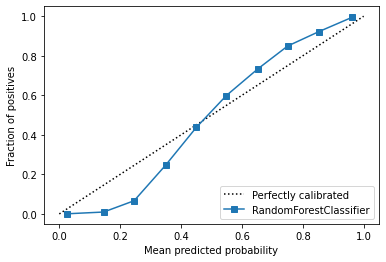

In [156]:
CalibrationDisplay.from_estimator(forest, ct.transform(X_mid), y_mid, n_bins=10)

In [157]:
def expected_calibration_error(y, proba, bins = 'fd'):
  import numpy as np
  bin_count, bin_edges = np.histogram(proba, bins = bins)
  n_bins = len(bin_count)
  bin_edges[0] -= 1e-8 # because left edge is not included
  bin_id = np.digitize(proba, bin_edges, right = True) - 1
  bin_ysum = np.bincount(bin_id, weights = y, minlength = n_bins)
  bin_probasum = np.bincount(bin_id, weights = proba, minlength = n_bins)
  bin_ymean = np.divide(bin_ysum, bin_count, out = np.zeros(n_bins), where = bin_count > 0)
  bin_probamean = np.divide(bin_probasum, bin_count, out = np.zeros(n_bins), where = bin_count > 0)
  ece = np.abs((bin_probamean - bin_ymean) * bin_count).sum() / len(proba)
  return ece

In [161]:
proba_valid = forest.predict_proba(ct.transform(X_mid))[:, 1]

In [162]:
proba_valid

array([0.63879124, 0.05252829, 0.00444839, ..., 0.9872054 , 0.5935109 ,
       0.87994254])

In [163]:
expected_calibration_error(y_mid, proba_valid)

0.05523529494998427

In [170]:
from sklearn.isotonic import IsotonicRegression
iso_reg = IsotonicRegression(y_min = 0, y_max = 1, out_of_bounds = 'clip').fit(proba_valid, y_mid)
proba_test_forest_isoreg = iso_reg.predict(forest.predict_proba(ct.transform(X_mid))[:, 1])

In [171]:
expected_calibration_error(y_mid, proba_test_forest_isoreg)

9.879312780411489e-14

In [172]:
proba_test_forest_isoreg

array([0.73529412, 0.00182076, 0.        , ..., 1.        , 0.66566806,
       0.94780382])

In [177]:
prob_true, prob_pred = calibration_curve(y_mid, proba_test_forest_isoreg, n_bins = 10)

In [183]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression().fit(proba_valid.reshape(-1, 1), y_mid)
proba_test_forest_logreg = log_reg.predict_proba(forest.predict_proba(ct.transform(X_mid))[:, 1].reshape(-1, 1))[:, 1]

In [184]:
expected_calibration_error(y_mid, proba_test_forest_logreg)

0.02215368999302227

In [190]:
expected_calibration_error(y_mid, proba_valid)

0.05523529494998427

In [198]:
import numpy as np
from numpy import linspace

In [201]:
z_bins = linspace(start = -1, stop = 1, num = 2000)
ECE = np.array([])
for i in range(len(z_bins)-1):
    ECE = np.append(ECE, expected_calibration_error(y_mid, proba_valid/z_bins[i]))

In [202]:
ECE

array([1.00006774, 1.00056856, 1.00107038, ..., 0.05404217, 0.05444068,
       0.05483838])

In [204]:
np.argmin(ECE)

1960

In [208]:
ECE[1960]

0.04525430012012432